# Bag of Words 


In [1]:
import numpy as np
import pandas as pd

In [2]:
data_imdb = pd.read_csv("imdb_labelled.txt", delimiter='\t', header=None)
data_imdb.columns = ["Review_text", "Review_class"]

data_amazon = pd.read_csv("amazon_cells_labelled.txt", delimiter='\t', header=None)
data_amazon.columns = ["Review_text", "Review_class"]

data_yelp = pd.read_csv("yelp_labelled.txt", delimiter='\t', header=None)
data_yelp.columns = ["Review_text", "Review_class"]

data = pd.concat([data_imdb, data_amazon, data_yelp])
data



,Review_text,Review_class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
data_amazon.shape,data_imdb.shape, data_yelp.shape

((1000, 2), (748, 2), (1000, 2))

In [4]:
data = pd.concat([data_imdb,data_amazon,data_yelp])
data

,Review_text,Review_class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [6]:
def clean_text(df):
    all_reviews = list()
    lines = df['Review_text'].values.tolist()
    for text in lines:
        text = text.lower()
        
        # removing the urls 
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('',text)
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]","",text) # removing punctuations
        
        tokens = word_tokenize(text) # word_tokenize--> returns the list and .split ---> returns as string
        
        table = str.maketrans('','',string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words('english'))
        stop_words.discard("not") # discard the not word coz it may be necessary for our algorithim in sentiment analysis
        ps = PorterStemmer()
        
        words = [ps.stem(w) for w in words if w not in stop_words]
        words = ' '.join(words)
        all_reviews.append(words)
        
    return all_reviews
        

all_reviews = clean_text(data)
all_reviews[0:20]
        

['slowmov aimless movi distress drift young man',
 'not sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost nonexist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act postproduct edit direct aspect filmmak',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema think film some

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=3) # taking words occured atleast 3 times in the corpus
x = cv.fit_transform(all_reviews).toarray()
y = data['Review_class']
np.shape(x) , np.shape(y)

((2748, 1192), (2748,))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test ,  y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.naive_bayes import GaussianNB
model  = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, f1_score, precision_score , roc_auc_score , roc_curve, auc
print(accuracy_score(y_pred,y_test))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.6618181818181819
0.7038216560509554
0.6314285714285715
0.6603496614473128


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fpr , tpr, threshold = roc_curve(y_test,y_pred)

In [13]:
auc_crve = auc(fpr, tpr)
auc_crve

0.6603496614473128

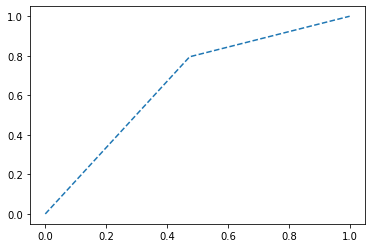

In [14]:
plt.plot(fpr,tpr,linestyle='--',label='auc score')
plt.show()

# Text Cleaning and Preprocessing

In [2]:
data_imdb = pd.read_csv("imdb_labelled.txt", delimiter='\t', header=None)
data_imdb.columns = ["Review_text", "Review_class"]

data_amazon = pd.read_csv("amazon_cells_labelled.txt", delimiter='\t', header=None)
data_amazon.columns = ["Review_text", "Review_class"]

data_yelp = pd.read_csv("yelp_labelled.txt", delimiter='\t', header=None)
data_yelp.columns = ["Review_text", "Review_class"]

data = pd.concat([data_imdb, data_amazon, data_yelp])
data

,Review_text,Review_class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [7]:
def clean_text(df):
    all_reviews = []
    lines = df['Review_text'].values.tolist()
    for text in lines :
        text = text.lower()
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('',text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'',text)
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]",'',text)
        
        tokens = nltk.word_tokenize(text)
        
        tbl = str.maketrans('','',string.punctuation)
        tokens = [t.translate(tbl) for t in tokens]
        
        words = [w for w in tokens if w.isalpha()]
        words = ' '.join(words)
        
        all_reviews.append(words)
    return all_reviews

In [12]:
cleaned_data = clean_text(data)
cleaned_data

['a very very very slowmoving aimless movie about a distressed drifting young man',
 'not sure who was more lost the flat characters or the audience nearly half of whom walked out',
 'attempting artiness with black white and clever camera angles the movie disappointed became even more ridiculous as the acting was poor and the plot and lines almost nonexistent',
 'very little music or anything to speak of',
 'the best scene in the movie was when gerardo is trying to find a song that keeps running through his head',
 'the rest of the movie lacks art charm meaning if it is about emptiness it works i guess because it is empty',
 'wasted two hours',
 'saw the movie today and thought it was a good effort good messages for kids',
 'a bit predictable',
 'loved the casting of jimmy buffet as the science teacher',
 'and those baby owls were adorable',
 'the movie showed a lot of florida at it is best made it look very appealing',
 'the songs were the best and the muppets were so hilarious',
 'it